<a href="https://colab.research.google.com/github/dudcoco/machine_deep_learning/blob/main/naju_bus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving naju_bus.csv to naju_bus.csv


In [ ]:
import pandas as pd
import numpy as np
naju_bus = pd.read_csv('naju_bus.csv', encoding='cp949')
naju_bus.head()

,날짜,노선ID,노선명,정류소ID,정류소명,운행시간대,승차인원,하차인원
0,2023-07-01,1002,100,52,공산,8,0,4
1,2023-07-01,1002,100,1266,나주중앙병원,8,0,2
2,2023-07-01,1002,100,378,동강,7,2,0
3,2023-07-01,1002,100,399,동산마을종점,7,2,0
4,2023-07-01,1002,100,577,봉추,7,2,1


In [ ]:
naju_bus.info()
# 결과 : 정류소명에 null값 포함되어있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248238 entries, 0 to 248237
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      248238 non-null  object
 1   노선ID    248238 non-null  int64 
 2   노선명     248238 non-null  object
 3   정류소ID   248238 non-null  int64 
 4   정류소명    244737 non-null  object
 5   운행시간대   248238 non-null  int64 
 6   승차인원    248238 non-null  int64 
 7   하차인원    248238 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 15.2+ MB


In [ ]:
print('전체 데이터 수 : ', len(naju_bus))
print('결측치 개수 : ')
len(naju_bus) - naju_bus.count()

전체 데이터 수 :  248238
결측치 개수 : 


날짜          0
노선ID        0
노선명         0
정류소ID       0
정류소명     3501
운행시간대       0
승차인원        0
하차인원        0
dtype: int64

In [ ]:
zero_rows = naju_bus[naju_bus["정류소ID"] == 0]
print(zero_rows)
# 결과 : 정류소ID가 0이면 정류소명이 결측치(NaN)임. 이런 데이터 다 삭제..해보기

                날짜  노선ID  노선명  정류소ID 정류소명  운행시간대  승차인원  하차인원
81      2023-07-01  1204  100      0  NaN     12     0     2
272     2023-07-01  1042  104      0  NaN     18     0    10
371     2023-07-01  1255  105      0  NaN     11     0     3
423     2023-07-01  1270  107      0  NaN     18     6     2
481     2023-07-01  1291  109      0  NaN     13     0     2
...            ...   ...  ...    ...  ...    ...   ...   ...
247438  2023-07-31  9914  999      0  NaN     16     0     1
247439  2023-07-31  9914  999      0  NaN     18     2     1
247440  2023-07-31  9914  999      0  NaN     21     0     2
247957  2023-07-31  8013  셔틀1      0  NaN      7     1     1
248032  2023-07-31  8014  셔틀2      0  NaN     15     2     1

[3501 rows x 8 columns]


In [ ]:
naju_bus = naju_bus.dropna(subset=['정류소명'])
print(naju_bus.info())
# 결과 : 정류소명에 결측치를 포함하고 있던 행이 제거된 것을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244737 entries, 0 to 248237
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      244737 non-null  object
 1   노선ID    244737 non-null  int64 
 2   노선명     244737 non-null  object
 3   정류소ID   244737 non-null  int64 
 4   정류소명    244737 non-null  object
 5   운행시간대   244737 non-null  int64 
 6   승차인원    244737 non-null  int64 
 7   하차인원    244737 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 16.8+ MB
None


In [ ]:
naju_bus.describe()

,노선ID,정류소ID,운행시간대,승차인원,하차인원
count,244737.000000,244737.000000,244737.000000,244737.000000,244737.000000
mean,4541.844372,1063.670941,13.275128,1.467224,1.102514
std,3385.386420,939.747435,4.583727,2.223743,1.916426
min,176.000000,2.000000,0.000000,0.000000,0.000000
25%,1606.000000,385.000000,9.000000,0.000000,0.000000
50%,4003.000000,810.000000,13.000000,1.000000,1.000000
75%,7016.000000,1463.000000,17.000000,2.000000,1.000000
max,9995.000000,5103.000000,23.000000,96.000000,93.000000


In [ ]:
naju_bus = naju_bus.replace({'운행시간대':0}, 24) # 0시를 24시로 바꿈. 버스 운행 시간 쉽게 알기 위함
naju_bus.describe()
# 결과 : 05시부터 24시까지 버스 운행.  1-4시는 운행 X

,노선ID,정류소ID,운행시간대,승차인원,하차인원
count,244737.000000,244737.000000,244737.000000,244737.000000,244737.000000
mean,4541.844372,1063.670941,13.276207,1.467224,1.102514
std,3385.386420,939.747435,4.583427,2.223743,1.916426
min,176.000000,2.000000,5.000000,0.000000,0.000000
25%,1606.000000,385.000000,9.000000,0.000000,0.000000
50%,4003.000000,810.000000,13.000000,1.000000,1.000000
75%,7016.000000,1463.000000,17.000000,2.000000,1.000000
max,9995.000000,5103.000000,24.000000,96.000000,93.000000


In [ ]:
# 시간대 기준 4개 그룹으로 분류해보기. 05-09:그룹1 / 10-14:그룹2 / 15-19:그룹3 / 20-24:그룹4
bins = [5, 9, 14, 19, 24]
labels = [1, 2, 3, 4]
naju_bus['운행시간대_그룹'] = pd.cut(naju_bus['운행시간대'], bins=bins, labels=labels)
naju_bus

,날짜,노선ID,노선명,정류소ID,정류소명,운행시간대,승차인원,하차인원,운행시간대_그룹
0,2023-07-01,1002,100,52,공산,8,0,4,1
1,2023-07-01,1002,100,1266,나주중앙병원,8,0,2,1
2,2023-07-01,1002,100,378,동강,7,2,0,1
3,2023-07-01,1002,100,399,동산마을종점,7,2,0,1
4,2023-07-01,1002,100,577,봉추,7,2,1,1
...,...,...,...,...,...,...,...,...,...
248233,2023-07-31,8016,우정2,5086,빛가람병원후문,17,5,3,3
248234,2023-07-31,8016,우정2,5086,빛가람병원후문,18,1,1,3
248235,2023-07-31,8016,우정2,5086,빛가람병원후문,19,1,1,3
248236,2023-07-31,8016,우정2,5086,빛가람병원후문,20,1,6,4


<ipython-input-42-f7078ca800bf>:23: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 간격 조절
<ipython-input-42-f7078ca800bf>:23: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 간격 조절
<ipython-input-42-f7078ca800bf>:23: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 간격 조절
<ipython-input-42-f7078ca800bf>:23: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 간격 조절
<ipython-input-42-f7078ca800bf>:23: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 간격 조절
<ipython-input-42-f7078ca800bf>:23: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 간격 조절
<ipython-input-42-f7078ca800bf>:23: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missin

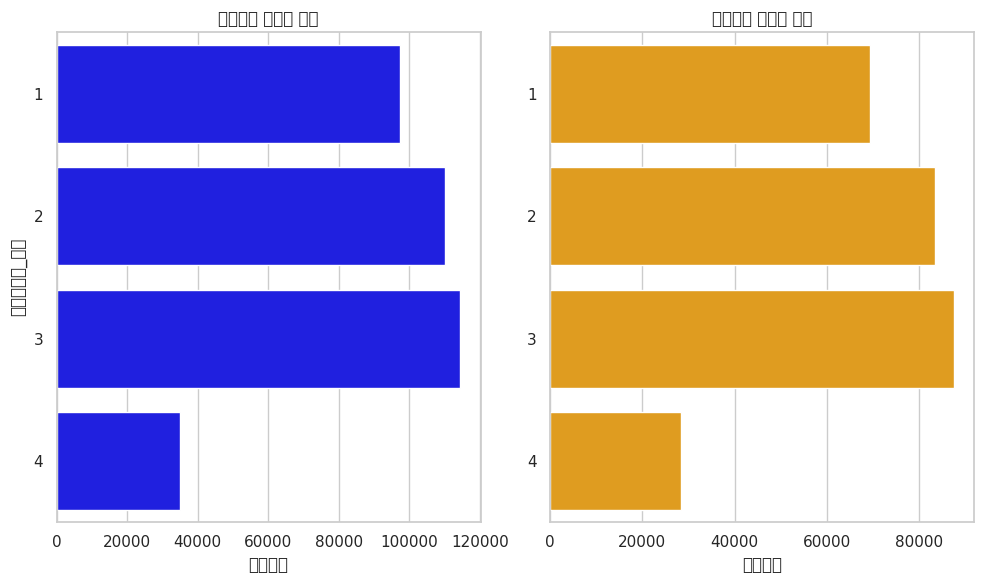

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

grouped_data = naju_bus.groupby("운행시간대_그룹")[["승차인원", "하차인원"]].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# 승차인원 그래프 그리기
plt.subplot(1, 2, 1)  # 1행 2열의 서브플롯 중 첫 번째
sns.barplot(data=grouped_data, x="승차인원", y="운행시간대_그룹", color="blue")
plt.xlabel("승차인원")
plt.ylabel("운행시간대_그룹")
plt.title("승차인원 그룹별 분포")

# 하차인원 그래프 그리기
plt.subplot(1, 2, 2)  # 1행 2열의 서브플롯 중 두 번째
sns.barplot(data=grouped_data, x="하차인원", y="운행시간대_그룹", color="orange")
plt.xlabel("하차인원")
plt.ylabel("")  # y축 레이블 생략
plt.title("하차인원 그룹별 분포")

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()